# **ELT574 - Aprendizado de Máquinas**
**Roteiro dirigido da Semana 4**



Crie um Notebook no Google Colab com o nome [ELT574 Semana 4 <Matrícula>], modificando o campo <Matrícula> pela sua matrícula do Sapiens (Exemplo: ELT574 Semana 4 12700-0). Conforme o roteiro abaixo, responda os questionamento e implemente rotinas para realizar os cálculos necessários.

1. O que você entende por fuzificação de entradas reais?

2. Desenhe a forma de onda de 4 funções de pertinência que podem ser utilizadas nos processos de fuzificação de entradas.

3. Como é feito a construção das regras de inferência dos sistemas baseados em lógica fuzzy?

4. No material disponibilizado na disciplina, apostila e aulas gravadas, foi construído um sistema de inferência fuzzy Mamdani para sugerir a gorjeta para garçons em um restaurante. Utilizando este sistema, calcule a saída para as entradas:

  1. Comida = 3 e Serviço = 8

  2. Comida = 8 e Serviço = 6

  3. É possível alcançar o valor máximo de gorjeta?

5. Implemente o exemplo da gorjeta para o garçom utilizando o método de inferência Takagi-Sugeno-Kang com as funções das regras propostas na atividade. Calcule a saída para as entradas do item 4. É possível alcançar o valor máximo de gorjeta neste tipo de inferência?

Todas as questões devem ser inseridas no notebook do Google Colab. O link para o notebook deve ser enviado como resposta da tarefa.

## Resposta 1
Por fuzificação das entradas reais se deve entender a transformação dos valores de entrada pelos termos e funções de pertinência estabelecidos pelo especialista.

Exemplificando: imagine-se um conjunto de pessoas que devem ser classificadas como pertencentes às classes pobre, média ou rica. Digamos que serão considerados pobres quem recebe até 1000 reais pr mês; de classe média quem recebe entre 1000 e 4000 reais; e da rica quem recebe acima de 4000 reais. Esses termos compõe o conjunto fuzzy, que será usado para descrever uma variável.

O modelo recebe a variável crisp, digamos 2500 reais, mapeando-a segundo uma função de pertinência, que é uma escala que varia de 0 a 1 e reflete o grau de pertinência do valor para cada um dos termos antes definidos.



## Resposta 2



In [1]:
!pip install simpful
import simpful as sf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


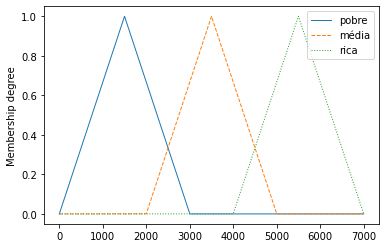

In [2]:
# Triangular
Tri_1 = sf.TriangleFuzzySet(a=0, b=1500, c=3000, term="pobre")
Tri_2 = sf.TriangleFuzzySet(a=2000, b=3500, c=5000, term="média")
Tri_3 = sf.TriangleFuzzySet(a=4000, b=5500, c=7000, term="rica")
sf.LinguisticVariable([Tri_1, Tri_2, Tri_3], universe_of_discourse=[0, 7000]).plot()

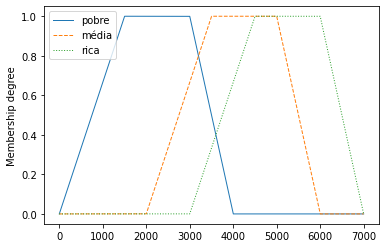

In [3]:
# Trapezoidal
Tra_1 = sf.TrapezoidFuzzySet(a=0, b=1500, c=3000, d=4000, term="pobre")
Tra_2 = sf.TrapezoidFuzzySet(a=2000, b=3500, c=5000, d=6000, term="média")
Tra_3 = sf.TrapezoidFuzzySet(a=3000, b=4500, c=6000, d=7000, term="rica")
sf.LinguisticVariable([Tra_1, Tra_2, Tra_3], universe_of_discourse=[0, 7000]).plot()

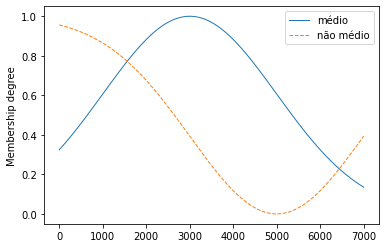

In [4]:
# Gaussian
G_1 = sf.GaussianFuzzySet(mu=3000, sigma=2000, term="médio")
G_2 = sf.InvGaussianFuzzySet(mu=5000, sigma=2000, term="não médio")
sf.LinguisticVariable([G_1, G_2], universe_of_discourse=[0, 7000]).plot()

## Resposta 3
As regras de inferência ou regras fuzzy são elaboradas por meio de declarações do tipo IF/THEN. A primeira parte das regras é chamada de antecedente e a parte que seguem o THEN (ENTÃO) é denominada consequente.


## Resposta 4


In [5]:
from simpful import *
FS = FuzzySystem()

# Qualidade do serviço
S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor") # saida = [0% 100% 0%]
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0,10]))

# Qualidade da comida
F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="rancid")
F_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=10), term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality", universe_of_discourse=[0,10]))

# Gorjeta
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="small")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term="average")
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term="generous")
FS.add_linguistic_variable("Tip", LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0,25]))

# Regras
R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.9.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



4.1. Utilizando este sistema, calcule a saída para as entradas:

Comida = 3 e Serviço = 8

In [6]:
FS.set_variable("Service", 8)
FS.set_variable("Food", 3)
print(FS.Mamdani_inference(["Tip"]))

{'Tip': 14.640880699744438}


4.2. Utilizando este sistema, calcule a saída para as entradas:

Comida = 8 e Serviço = 6

In [7]:
FS.set_variable("Service", 6)
FS.set_variable("Food", 8)
print(FS.Mamdani_inference(["Tip"]))

{'Tip': 14.344242940525978}


4.3. Como se pode ver no gráfico que segue, não é possível alcançar o valor máximo quando se adota a fuzzificação com o método Mamdami.

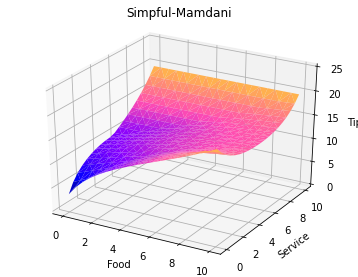

In [8]:
import matplotlib.pylab as pltpy
from numpy import linspace, array
# Plotting surface
xs = []
ys = []
zs = []
DIVs = 20
for x in linspace(0,10,DIVs):
	for y in linspace(0,10,DIVs):
		FS.set_variable("Food", x)
		FS.set_variable("Service", y)
		tip = FS.inference()['Tip']
		xs.append(x)
		ys.append(y)
		zs.append(tip)
xs = array(xs)
ys = array(ys)
zs = array(zs)

from mpl_toolkits.mplot3d import Axes3D
fig = pltpy.figure(figsize=(10, 4))
fs_mam = fig.add_subplot(1,2,1, projection='3d')

xx, yy = pltpy.meshgrid(xs,ys)

fs_mam.plot_trisurf(xs,ys,zs, vmin=0, vmax=25, cmap='gnuplot2')
fs_mam.set_xlabel("Food")
fs_mam.set_ylabel("Service")
fs_mam.set_zlabel("Tip")
fs_mam.set_title("Simpful-Mamdani", pad=20)
fs_mam.set_zlim(0, 25)
pltpy.tight_layout()
pltpy.show()

## Resposta 5

In [9]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS_TS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS_TS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

F_1 = FuzzySet(points=[[0., 1.],  [10., 0.]], term="rancid")
F_2 = FuzzySet(points=[[0., 0.],  [10., 1.]], term="delicious")
FS_TS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality"))

# Define output crisp values
FS_TS.set_crisp_output_value("small", 5)
FS_TS.set_crisp_output_value("average", 15)

# Define function for generous tip (food score + service score + 5%)
FS_TS.set_output_function("generous", "0.5*Food+0.5*Service+5")

# Define fuzzy rules
R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS_TS.add_rules([R1, R2, R3])

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.9.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

 * Detected Sugeno model type


5.1. Calcule a saída para as entradas:

Comida = 3 e Serviço = 8

In [10]:
# Set antecedents values
FS_TS.set_variable("Service", 8)
FS_TS.set_variable("Food", 3)

# Perform Sugeno inference and print output
print(FS_TS.Sugeno_inference(["Tip"]))

{'Tip': 12.299999999999999}


5.2. Calcule a saída para as entradas:

Comida = 8 e Serviço = 6

In [11]:
# Set antecedents values
FS_TS.set_variable("Service", 6)
FS_TS.set_variable("Food", 8)

# Perform Sugeno inference and print output
print(FS_TS.Sugeno_inference(["Tip"]))

{'Tip': 13.5}


Como se pode ver no gráfico que segue, não é possível alcançar o valor máximo quando se adota a fuzzificação com o método Mamdami.

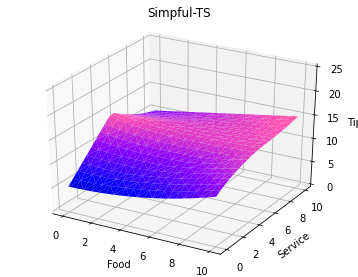

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = pltpy.figure(figsize=(10, 4))
xs = []
ys = []
zs_TS = []
DIVs = 20
for x in linspace(0,10,DIVs):
	for y in linspace(0,10,DIVs):
		FS_TS.set_variable("Food", x)
		FS_TS.set_variable("Service", y)
		tip = FS_TS.inference()['Tip']
		xs.append(x)
		ys.append(y)
		zs_TS.append(tip)
xs = array(xs)
ys = array(ys)
zs_TS = array(zs_TS)

fs_ts = fig.add_subplot(1,2,2, projection='3d')

fs_ts.plot_trisurf(xs,ys,zs_TS, vmin=0, vmax=25, cmap='gnuplot2')
fs_ts.set_xlabel("Food")
fs_ts.set_ylabel("Service")
fs_ts.set_zlabel("Tip")
fs_ts.set_title("Simpful-TS", pad=20)
fs_ts.set_zlim(0, 25)
pltpy.tight_layout()

pltpy.show()